In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
from sklearn.model_selection import train_test_split, LearningCurveDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Fetch the dataset (UCI ID for "Bank Marketing" is 222)
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Optionally, combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# View the first few rows
print(df.head())

# Access metadata and variable information
# print(bank_marketing.metadata)
# print(bank_marketing.variables)

print(df.info())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to

In [3]:
df['job'] = df['job'].fillna(df['job'].mode())
df['education'] = df['education'].fillna(df['education'].mode())
df['contact'] = df['contact'].fillna('Other')
df['poutcome'] = df['poutcome'].fillna('Other')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [4]:
# One hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'education', 'poutcome', 'month'], drop_first=True)

# Label Encoding/Mapping (Ordinal): 'yes' becomes 1 and 'no' becomes 0
le = LabelEncoder()
cols = ['default', 'housing', 'loan', 'y']
df['y'] = column_or_1d(df['y'], warn=True)

for col in cols:
    df[col] = le.fit_transform(df[col])
print("\nTarget Variable Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

print(df.columns)
print(df.head())


Target Variable Mapping: {'no': np.int64(0), 'yes': np.int64(1)}
Index(['age', 'default', 'balance', 'housing', 'loan', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'education_secondary',
       'education_tertiary', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')
   age  default  balance  housing  loan  day_of_week  duration  campaign  \
0   58        0     2143        1     0            5       261         1   
1   44        0       29        1     0            5       151         1   

In [5]:
# Redefine X and y
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


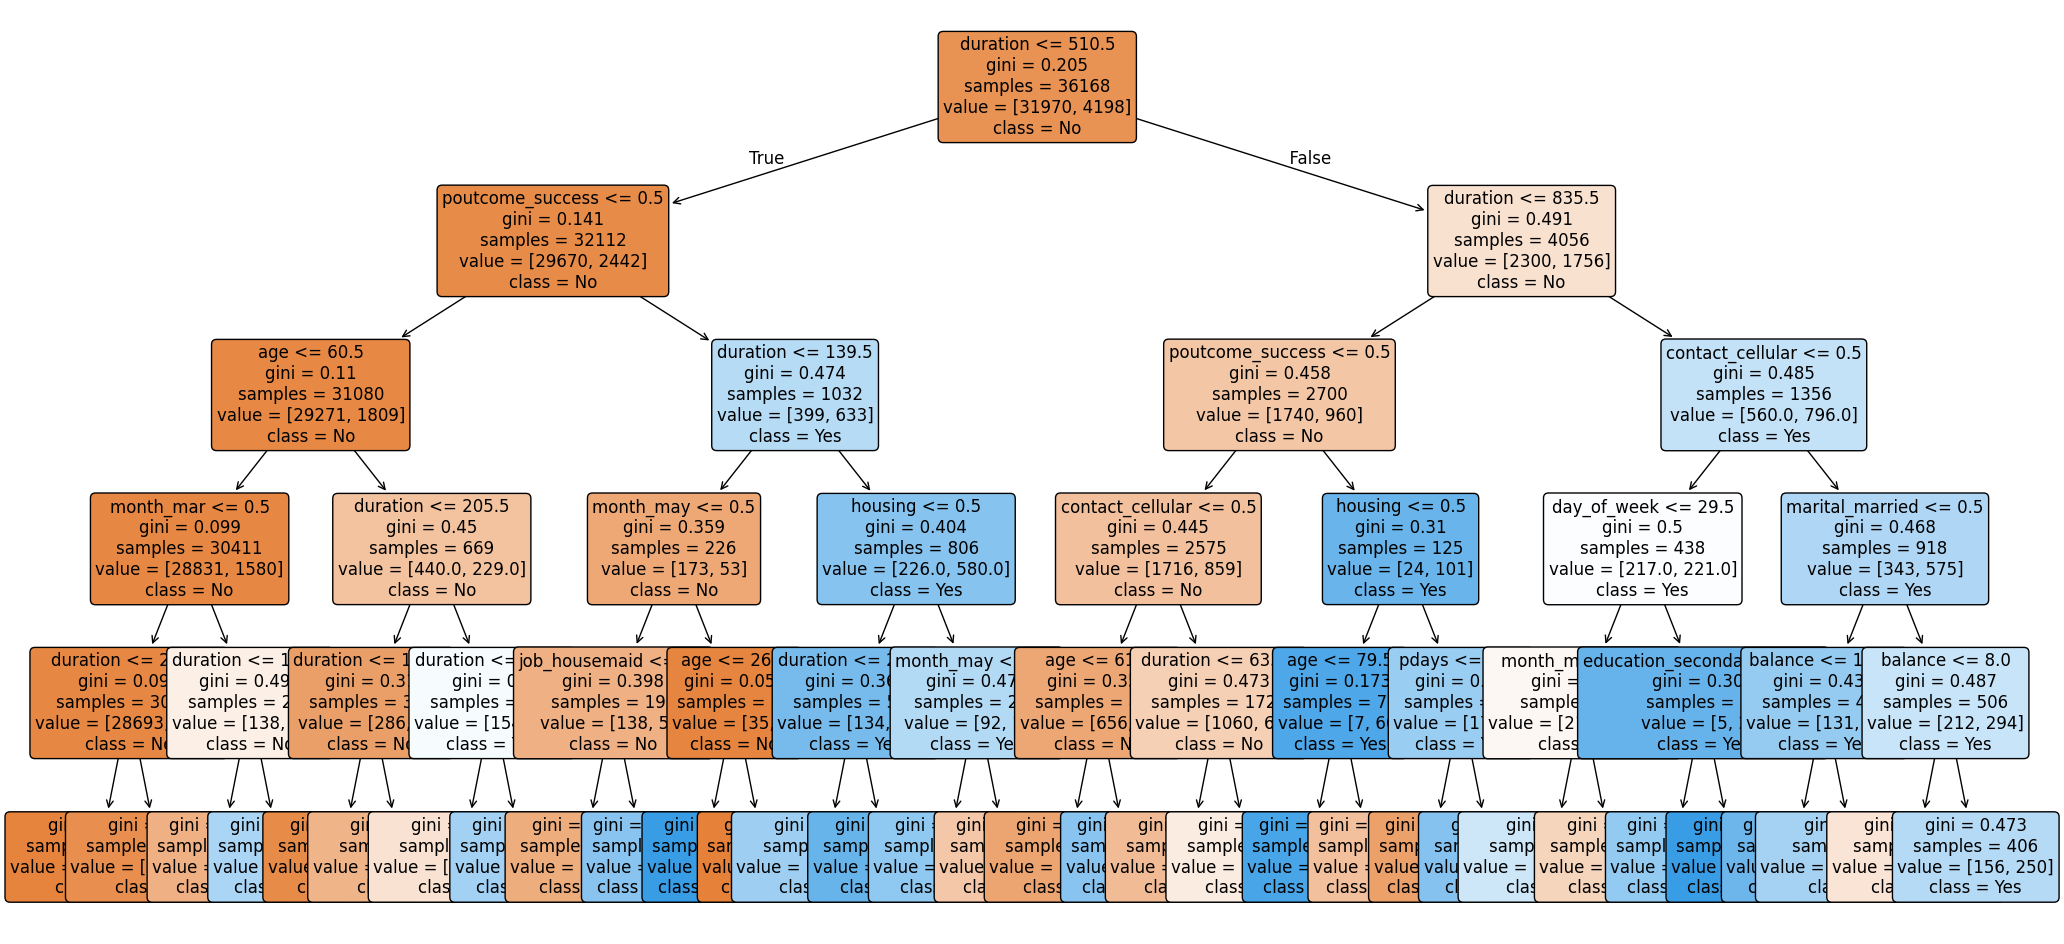

|--- duration <= 510.50
|   |--- poutcome_success <= 0.50
|   |   |--- age <= 60.50
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- duration <= 203.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  203.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- month_mar >  0.50
|   |   |   |   |--- duration <= 151.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  151.50
|   |   |   |   |   |--- class: 1
|   |   |--- age >  60.50
|   |   |   |--- duration <= 205.50
|   |   |   |   |--- duration <= 126.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  126.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- duration >  205.50
|   |   |   |   |--- duration <= 362.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  362.50
|   |   |   |   |   |--- class: 1
|   |--- poutcome_success >  0.50
|   |   |--- duration <= 139.50
|   |   |   |--- month_may <= 0.50
|   |   |   |   |--- job_housemaid <= 0.50
|   |   |   

In [7]:
plt.figure(figsize=(25,12))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=12)
# Save the plot as a high-resolution image to zoom in further
plt.savefig('bank_tree.png', dpi=300, bbox_inches='tight')
plt.show()
# This allows you to see the logic of the splits, such as "If duration > X and poutcome is 'success', then 'yes'".

# The visual plot is still too cluttered, print a clear text-based version of the rules:
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.64      0.34      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



Training Score: 0.9067
Test Score: 0.8972
Gap: 0.0096


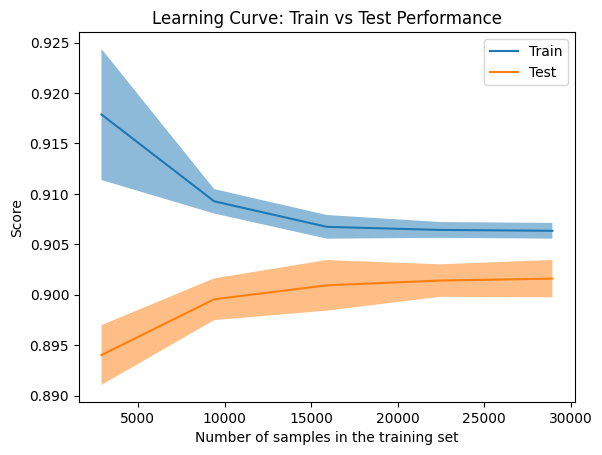

In [9]:
# Healthy Model: Training and testing accuracies are close.
# Overfitting: Training accuracy is significantly higher (e.g., 99%) than testing accuracy (e.g., 85%), indicating the tree is too deep

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Gap: {train_score - test_score:.4f}")

# If training accuracy is significantly higher than test accuracy, the tree is too deep and needs further pruning (reducing max_depth).

LearningCurveDisplay.from_estimator(model, X_train, y_train, cv=5)
plt.title("Learning Curve: Train vs Test Performance")
plt.show()